# Preparing time series for cross-correlation analysis between social isolation and R0
References:
* https://www.geeksforgeeks.org/matplotlib-pyplot-xcorr-in-python/
* https://coderzcolumn.com/tutorials/data-science/how-to-remove-trend-and-seasonality-from-time-series-data-using-python-pandas
* https://www.datainsightonline.com/post/cross-correlation-with-two-time-series-in-python
* https://online.stat.psu.edu/stat510/lesson/8/8.2

In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm

## Loading data

In [2]:
df_covid_mobility = pd.read_csv('../data/df_base_analysis.csv')
df_covid_mobility.DATA = pd.to_datetime(df_covid_mobility.DATA, infer_datetime_format=True)

In [3]:
df_covid_mobility.columns

Index(['CODIGO_MUNICIPIO_6', 'municipality', 'DATA', 'r0', 'index',
       'CODIGO_MUNICIPIO_7', 'PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS',
       'PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS',
       'NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIA',
       'ONSET_NUMERO_REPRODUCAO_EFETIVO_MEDIA'],
      dtype='object')

## Checking stationarity of time series

In [4]:
def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    result = pd.DataFrame({'Test Statistic': [dftest[0]],'P-value': [dftest[1]],'Lags Used': [dftest[2]],'No of Observations': [dftest[3]]}).round(2)
    return result

def kpss_test(timeseries):
    result = kpss(timeseries)
    test_statistic = result[0]
    p_value = result[1]
    lags_used = result[2]
    return pd.DataFrame({
        'Test Statistic': [test_statistic],
        'P-value': [p_value],
        'Lags Used': [lags_used]
    }).round(2)

df_test_satationary_adf = pd.DataFrame()
df_test_stationary_kpss = pd.DataFrame()

for id_municipality in df_covid_mobility.CODIGO_MUNICIPIO_7.unique():
    df_temp = df_covid_mobility[df_covid_mobility.CODIGO_MUNICIPIO_7==id_municipality]
    name_municipality = df_temp.municipality.values[0]
    for column in ['PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS', 'r0']:
        
        values = df_temp[column].dropna().values
                    
        result = adf_test(values)
        result['CODIGO_MUNICIPIO_7'] = id_municipality
        result['MUNICIPIO'] = name_municipality
        result['COLUMN'] = column
        df_test_satationary_adf = pd.concat([df_test_satationary_adf, result], ignore_index=True)
        
        result = kpss_test(values)
        result['CODIGO_MUNICIPIO_7'] = id_municipality
        result['MUNICIPIO'] = name_municipality
        result['COLUMN'] = column
        df_test_stationary_kpss = pd.concat([df_test_stationary_kpss, result], ignore_index=True)

<ipython-input-4-a8e913950d63>:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(timeseries)
<ipython-input-4-a8e913950d63>:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(timeseries)
<ipython-input-4-a8e913950d63>:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(timeseries)
<ipython-input-4-a8e913950d63>:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(timeseries)
<ipython-input-4-a8e913950d63>:7: InterpolationWarning: The test statistic is outsid

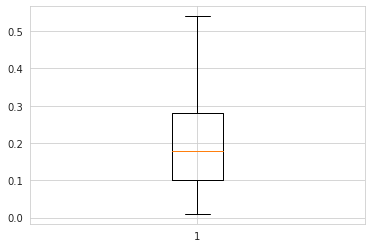

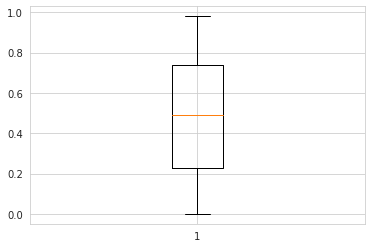

In [5]:
plt.boxplot(df_test_satationary_adf[df_test_satationary_adf.COLUMN == 'PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS']['P-value'])
plt.show()
plt.boxplot(df_test_satationary_adf[df_test_satationary_adf.COLUMN == 'r0']['P-value'])
plt.show()

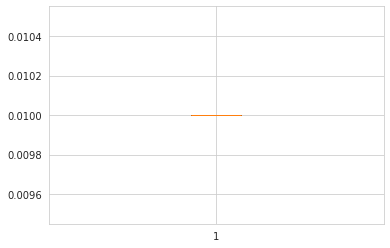

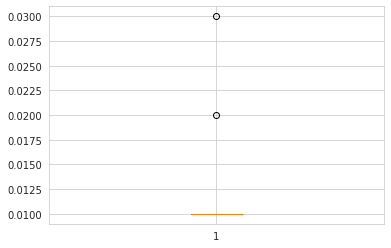

In [6]:
plt.boxplot(df_test_stationary_kpss[df_test_stationary_kpss.COLUMN == 'PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS']['P-value'])
plt.show()
plt.boxplot(df_test_stationary_kpss[df_test_stationary_kpss.COLUMN == 'r0']['P-value'])
plt.show()

In [7]:
print(df_test_satationary_adf[df_test_satationary_adf.COLUMN == 'PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS']['P-value'].describe())
print(df_test_satationary_adf[df_test_satationary_adf.COLUMN == 'r0']['P-value'].describe())

count    41.000000
mean      0.202927
std       0.123940
min       0.010000
25%       0.100000
50%       0.180000
75%       0.280000
max       0.540000
Name: P-value, dtype: float64
count    41.000000
mean      0.491707
std       0.304096
min       0.000000
25%       0.230000
50%       0.490000
75%       0.740000
max       0.980000
Name: P-value, dtype: float64


In [8]:
df_test_satationary_adf[df_test_satationary_adf.COLUMN == 'r0']

,Test Statistic,P-value,Lags Used,No of Observations,CODIGO_MUNICIPIO_7,MUNICIPIO,COLUMN
1,-1.68,0.44,8,1003,5201405,Aparecida de Goiânia,r0
3,-4.04,0.00,5,1023,2800308,Aracaju,r0
5,-0.38,0.91,8,1029,3106200,Belo Horizonte,r0
7,-2.68,0.08,10,1034,1501402,Belém,r0
9,-0.31,0.92,11,1024,5300108,Brasília,r0
11,-0.51,0.89,5,1022,3509502,Campinas,r0
13,-1.04,0.74,11,1025,5002704,Campo Grande,r0
15,-2.08,0.25,8,1031,3118601,Contagem,r0
17,-1.45,0.56,15,1026,5103403,Cuiabá,r0
19,-1.50,0.53,5,1030,4106902,Curitiba,r0


In [9]:
df_test_stationary_kpss[df_test_stationary_kpss.COLUMN == 'r0']

,Test Statistic,P-value,Lags Used,CODIGO_MUNICIPIO_7,MUNICIPIO,COLUMN
1,3.79,0.01,19,5201405,Aparecida de Goiânia,r0
3,0.64,0.02,19,2800308,Aracaju,r0
5,4.29,0.01,19,3106200,Belo Horizonte,r0
7,1.32,0.01,19,1501402,Belém,r0
9,4.74,0.01,19,5300108,Brasília,r0
11,4.56,0.01,19,3509502,Campinas,r0
13,4.75,0.01,19,5002704,Campo Grande,r0
15,2.67,0.01,19,3118601,Contagem,r0
17,2.80,0.01,19,5103403,Cuiabá,r0
19,2.01,0.01,19,4106902,Curitiba,r0


## Treat stationarity of timeseries

In [10]:
len(df_covid_mobility)

42472

In [11]:
number_differencing_points = 7

order = (28, 0, 7)  # Order of the ARIMA model

df_diff=pd.DataFrame()
df_test_stationary_diff = pd.DataFrame()

for id_municipality in df_covid_mobility.CODIGO_MUNICIPIO_7.unique():
    df_temp = df_covid_mobility[df_covid_mobility.CODIGO_MUNICIPIO_7==id_municipality].copy()
    name_municipality = df_temp.municipality.values[0]
    for column in ['PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS', 'r0']:
        df_temp[column+'_DETRENDED'] = df_temp[column] - df_temp[column].shift(number_differencing_points)

        values = df_temp[column+'_DETRENDED'].dropna().values
            
        result = adf_test(values)
        result['CODIGO_MUNICIPIO_7'] = id_municipality
        result['MUNICIPIO'] = name_municipality
        result['COLUMN'] = column
                       
        model = sm.tsa.ARIMA(values, order=order)
        fit_model = model.fit()
        x_prewithining = fit_model.resid 
        df_temp.loc[df_temp.iloc[number_differencing_points:(number_differencing_points+len(x_prewithining))].index, column+'_WHITED'] = x_prewithining

        white_noise_test_p_value = diag.acorr_ljungbox(x_prewithining, boxpierce=True, model_df=0, period=None, return_df=None, lags=1)['lb_pvalue'].values[0]
        
        result['WHITE_NOISE_P_VALUE'] = white_noise_test_p_value

        df_test_stationary_diff = pd.concat([df_test_stationary_diff, result], ignore_index=True)

    df_diff = pd.concat([df_diff, df_temp], ignore_index=True)

/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-statio

In [12]:
df_diff[df_diff.municipality == 'São Paulo'][['DATA', 'PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS', 'PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS_DETRENDED', 'PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS_WHITED']]

,DATA,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS_DETRENDED,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS_WHITED
39367,2020-03-01,5.714286,NaN,NaN
39368,2020-03-02,3.857143,NaN,NaN
39369,2020-03-03,1.714286,NaN,NaN
39370,2020-03-04,0.428571,NaN,NaN
39371,2020-03-05,0.000000,NaN,NaN
...,...,...,...,...
40398,2022-12-27,NaN,NaN,NaN
40399,2022-12-28,NaN,NaN,NaN
40400,2022-12-29,NaN,NaN,NaN
40401,2022-12-30,NaN,NaN,NaN


In [13]:
df_test_stationary_diff[df_test_stationary_diff.COLUMN == 'PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS']['P-value'].describe()

count    41.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: P-value, dtype: float64

In [14]:
df_test_stationary_diff[df_test_stationary_diff.COLUMN == 'r0']['P-value'].describe()

count    41.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: P-value, dtype: float64

In [15]:
df_test_stationary_diff[df_test_stationary_diff.COLUMN == 'PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS']['WHITE_NOISE_P_VALUE'].round(4).describe()

count    41.000000
mean      0.130724
std       0.249555
min       0.000000
25%       0.000100
50%       0.008300
75%       0.078700
max       0.915200
Name: WHITE_NOISE_P_VALUE, dtype: float64

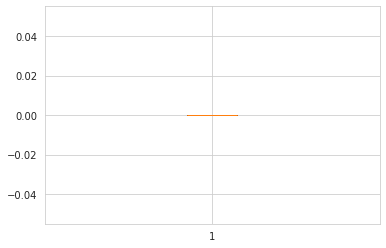

In [16]:
plt.boxplot(df_test_stationary_diff[df_test_stationary_diff.COLUMN == 'PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS']['P-value'])
plt.show()

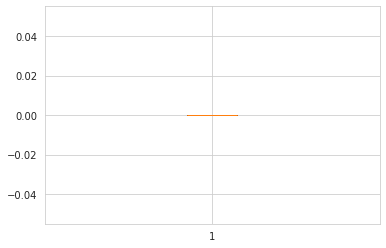

In [17]:
plt.boxplot(df_test_stationary_diff[df_test_stationary_diff.COLUMN == 'r0']['P-value'])
plt.show()

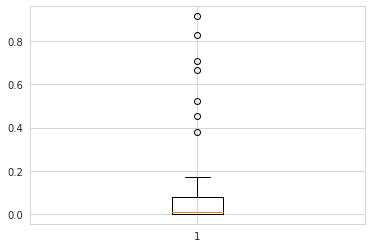

In [18]:
plt.boxplot(df_test_stationary_diff[df_test_stationary_diff.COLUMN == 'PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS']['WHITE_NOISE_P_VALUE'])
plt.show()

In [19]:
df_test_stationary_diff[(df_test_stationary_diff.COLUMN == 'PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS') & (df_test_stationary_diff['WHITE_NOISE_P_VALUE'] < 0.05)]

,Test Statistic,P-value,Lags Used,No of Observations,CODIGO_MUNICIPIO_7,MUNICIPIO,COLUMN,WHITE_NOISE_P_VALUE
2,-7.71,0.0,21,923,2800308,Aracaju,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,1.358601e-04
4,-8.62,0.0,22,931,3106200,Belo Horizonte,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,3.562595e-03
6,-4.83,0.0,22,938,1501402,Belém,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,3.673631e-02
10,-7.28,0.0,22,921,3509502,Campinas,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,1.986271e-12
14,-8.29,0.0,22,933,3118601,Contagem,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,5.783954e-04
16,-5.62,0.0,21,936,5103403,Cuiabá,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,2.959868e-02
18,-8.27,0.0,22,929,4106902,Curitiba,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,8.910114e-04
20,-5.64,0.0,22,941,3301702,Duque de Caxias,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,1.694361e-04
24,-8.43,0.0,22,923,4205407,Florianópolis,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,2.084782e-07
26,-5.53,0.0,22,937,2304400,Fortaleza,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,1.092944e-02


In [20]:
df_test_stationary_diff[(df_test_stationary_diff.COLUMN == 'r0') & (df_test_stationary_diff['WHITE_NOISE_P_VALUE'] < 0.05)]

,Test Statistic,P-value,Lags Used,No of Observations,CODIGO_MUNICIPIO_7,MUNICIPIO,COLUMN,WHITE_NOISE_P_VALUE
1,-5.24,0.0,22,982,5201405,Aparecida de Goiânia,r0,0.001120
3,-6.29,0.0,22,999,2800308,Aracaju,r0,0.012075
33,-5.57,0.0,22,1008,2607901,Jaboatão dos Guararapes,r0,0.002251
79,-5.59,0.0,19,1005,2211001,Teresina,r0,0.046216


## Saving data

In [21]:
df_diff.to_csv('../data/df_treated_time_series.csv')

In [22]:
df_test_stationary_diff.to_csv('../data/df_test_stationary_and_white_noise.csv')